# Exercise 05 ANN for Classification - Assignment - Solution

<span style="color:red">**The submission deadline of this assignment is 09/04/2024 23:59. In addition to the executed Jupyter Notebook, please also submit the saved `.pth` file of the trained ANN on Learn.**</span>

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Requirement

In this assignment, you are required to build a multi-class classification model using ANN.

The problem to be solved is to recognize the hand-written digits:

![](https://jamesmccaffrey.files.wordpress.com/2020/10/uci_digits_0_to_9-1.jpg)

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Build the data pipeline
- Create a multi-class classification ANN
- Train the ANN
- Save and load the trained model
- Make predictions and evaluation

### Import libraries

In [1]:
# [TBC] complete your code here with proper comments
# import the necessary libraries
import warnings

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# [TBC] complete your code here with proper comments
# suppress all warnings
warnings.filterwarnings("ignore")

## Task 1. Build the data pipeline

The hand-written digits dataset contains images of hand-written digits: 10 classes where each class refers to a digit. Find more details in this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset).
- Each hand-written digit image contains $8\times8$ pixels, which has already been converted to an 1D array with 64 features, each feature represent the value of a pixel.
- If you want to display the image, you need to re-converted the 1D array back to the 2D array ($8\times8$) with `reshape()` and display with `plt.imshow()`.

<span style="color:red">**[TBC]**</span> You need to:
- Use `sklearn.datasets.load_digits()` to load the hand-written digits dataset
- Pre-process the dataset
    - Scale numerical features with [standard scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    - encode categorical label with [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- Divide the dataset into the training, valiation, and test set
- Create `TensorDataset` instances to store the dataset
- Create `DataLoader` instance to wrap the dataset as iterable objects
    - Decide a proper batch size considering
        - The available memory of your computer
        - The desired number of batches in each epoch

In [3]:
# [TBC] complete your code here with proper comments
# load the dataset
feature, label = datasets.load_digits(
    return_X_y = True,
    as_frame = False, # get data as numpy array
)

The label of this hand-written digit is: 4


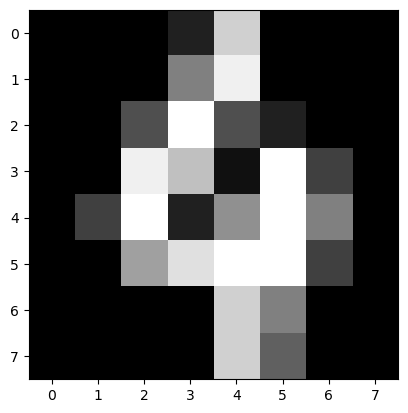

In [4]:
# [TBC] complete your code here with proper comments
# display an example
plt.imshow(feature[100].reshape(8, 8), cmap = 'gray')
print('The label of this hand-written digit is:', label[100])

In [5]:
# [TBC] complete your code here with proper comments
# feature scaling
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

In [6]:
# [TBC] complete your code here with proper comments
# one-hot encoding for label
encoder = OneHotEncoder(sparse = False)
encoded_label = encoder.fit_transform(label.reshape(-1, 1))
encoded_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
# [TBC] complete your code here with proper comments
# Split the dataset into train, validation, and test sets
# here we still use label, not encoded_label as the pytorch will perform one-hot encoding automatically
train_val_feature, test_feature, train_val_label, test_label = train_test_split(
    scaled_feature, label, test_size = 0.2, random_state = 0
)
train_feature, val_feature, train_label, val_label = train_test_split(
    train_val_feature, train_val_label, test_size = 0.25, random_state = 0
)

In [8]:
# [TBC] complete your code here with proper comments
# create the train, validatoin, and test dataset
# specify the type of data stored in the tensors to avoid incompatiblity
train_ds = TensorDataset(
    torch.tensor(train_feature, dtype = torch.float32),
    torch.tensor(train_label, dtype = torch.long)
)
val_ds = TensorDataset(
    torch.tensor(val_feature, dtype = torch.float32),
    torch.tensor(val_label, dtype = torch.long)
)
test_ds = TensorDataset(
    torch.tensor(test_feature, dtype = torch.float32),
    torch.tensor(test_label, dtype = torch.long)
)

In [9]:
# [TBC] complete your code here with proper comments
# create the train and test data loaders
batch_size = 128 # usually set to 2 to the nth power
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = batch_size, shuffle = False)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

## Task 2. Create a multi-class classification ANN

<span style="color:red">**[TBC]**</span> You need to:
- Create a custom class to define the structure of the network
    - Include batch normalization layers
    - Include dropout layers
- Create an instance of this class as the ANN

In [10]:
# [TBC] complete your code here with proper comments
# define a custom neural network class
class MultiClassificationNet(nn.Module):
    def __init__(self, n_features, n_labels):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.BatchNorm1d(128), # batch normalization
            nn.ReLU(),
            nn.Dropout(p = 0.5), # dropout with 50% probability
            nn.Linear(128, 64),
            nn.BatchNorm1d(64), # batch normalization
            nn.ReLU(),
            nn.Dropout(p = 0.5), # dropout with 50% probability
            nn.Linear(64, 16),
            nn.BatchNorm1d(16), # batch normalization
            nn.ReLU(),
            nn.Dropout(p = 0.5), # dropout with 50% probability
            nn.Linear(16, n_labels)
        )
    def forward(self, X):
        return self.net(X)

In [11]:
# [TBC] complete your code here with proper comments
# create the neural network
model = MultiClassificationNet(
    n_features = feature.shape[1],
    n_labels = encoded_label.shape[1]
)

## Task 3. Train the ANN

<span style="color:red">**[TBC]**</span> You need to:
- Define a `train()` function
    - Implement L2 regularization
    - Implement learning rate decay
    - Implement early stopping
- Train the ANN
    - Adjust the training hyper-parameters if necessary to get a good result
- Plot the loss history of the training process
    - Batch & epoch loss on the train set
    - Batch & epoch loss on the validation set
    - Train & validation epoch loss

In [12]:
# [TBC] complete your code here with proper comments
# define the training function
def train(train_dl, val_dl, model, loss_fn, optimizer, epochs, early_stopping_patience, lr_scheduler):
    # initialization
    min_val_loss = np.inf # initialize the val loss as an infinite positive value
    patience_counter = 0 # set the initial patience counter to zero
    train_batch_loss_history = [] # for recording the average train loss of a batch
    train_epoch_loss_history = [] # for recording the average train loss of an epoch
    val_batch_loss_history = [] # for recording the average val loss of an batch
    val_epoch_loss_history = [] # for recording the average val loss of an epoch
    
    # start training
    for epoch in range(epochs): # iterate pre-defined number of epoches
        # train set
        train_epoch_loss = 0.0 # initial train epoch loss is set to zero
        model.train() # set the model in training mode
        for (X, y) in train_dl: # get a batch of training samples
            logits = model(X) # forward propagation
            train_batch_loss = loss_fn(logits, y) # compute the current train batch loss
            train_batch_loss.backward() # compute gradients by backpropagation
            optimizer.step() # update learning parameters according to gradients
            optimizer.zero_grad() # reset the gradients to zero
            train_batch_loss_history.append(train_batch_loss.item()) # record current train batch loss
            train_epoch_loss += train_batch_loss.item() # accumulate train batch losses for compute train epoch loss
        train_epoch_loss /= len(train_dl) # compute current train epoch loss
        train_epoch_loss_history.append(train_epoch_loss) # record current train epoch loss
        # validation set
        val_epoch_loss = 0.0 # initial val epoch loss is set to zero
        model.eval() # set the model in evaluation mode
        with torch.no_grad():
            for (X, y) in val_dl: # get a batch of validation samples
                logits = model(X) # forward propagation
                val_batch_loss = loss_fn(logits, y) # compute the current val batch loss
                val_batch_loss_history.append(val_batch_loss.item()) # record current val batch loss
                val_epoch_loss += val_batch_loss.item() # accumulate val batch losses for compute val epoch loss
            val_epoch_loss /= len(val_dl) # compute current val epoch loss
            val_epoch_loss_history.append(val_epoch_loss) # record current val epoch loss
        print(f"Epoch {epoch + 1}: train loss = {train_epoch_loss:>5f}, val loss = {val_epoch_loss:>5f}") # print log
        # learning rate decay
        old_lr = optimizer.param_groups[0]['lr']
        lr_scheduler.step(val_epoch_loss)
        new_lr = optimizer.param_groups[0]['lr']
        if old_lr != new_lr:
            print(f'Learning rate reduced after epoch {epoch+1}')
        # early stopping
        if val_epoch_loss < min_val_loss:
            min_val_loss = val_epoch_loss # update the new min val loss
            patience_counter = 0 # reset patience counter to zero
        else:
            patience_counter += 1 # increase patience counter by 1
        if patience_counter >= early_stopping_patience:
            print('Early stopping!')
            break
    return train_batch_loss_history, val_batch_loss_history, train_epoch_loss_history, val_epoch_loss_history

In [13]:
# [TBC] complete your code here with proper comments
# define the training hyper-parameters
loss_fn = nn.CrossEntropyLoss() # use cross entropy loss for multi-class
learning_rate = 1e-1
weight_decay = 1e-5 # lambda for L2 regularization
optimizer = torch.optim.SGD(
    model.parameters(),
    lr = learning_rate,
    weight_decay = weight_decay
)
epochs = 1000
early_stopping_patience = 20
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode = 'min',
    factor = 0.1, # each step multiply the learning rate with 0.1
    patience = 5
)

In [14]:
# [TBC] complete your code here with proper comments
# train the neural network
train_batch_loss_history, val_batch_loss_history, train_epoch_loss_history, val_epoch_loss_history = train(
    train_dl,
    val_dl,
    model,
    loss_fn,
    optimizer,
    epochs,
    early_stopping_patience,
    lr_scheduler
)

Epoch 1: train loss = 2.329181, val loss = 2.253058
Epoch 2: train loss = 2.179179, val loss = 2.113380
Epoch 3: train loss = 2.090746, val loss = 1.934888
Epoch 4: train loss = 1.966334, val loss = 1.773090
Epoch 5: train loss = 1.863184, val loss = 1.614774
Epoch 6: train loss = 1.747715, val loss = 1.494646
Epoch 7: train loss = 1.695938, val loss = 1.374603
Epoch 8: train loss = 1.587250, val loss = 1.272003
Epoch 9: train loss = 1.553368, val loss = 1.175831
Epoch 10: train loss = 1.490845, val loss = 1.092211
Epoch 11: train loss = 1.462566, val loss = 1.006034
Epoch 12: train loss = 1.378555, val loss = 0.944156
Epoch 13: train loss = 1.332349, val loss = 0.881840
Epoch 14: train loss = 1.257473, val loss = 0.822586
Epoch 15: train loss = 1.302806, val loss = 0.779713
Epoch 16: train loss = 1.194977, val loss = 0.738710
Epoch 17: train loss = 1.213042, val loss = 0.695593
Epoch 18: train loss = 1.190616, val loss = 0.645825
Epoch 19: train loss = 1.136859, val loss = 0.611229
Ep

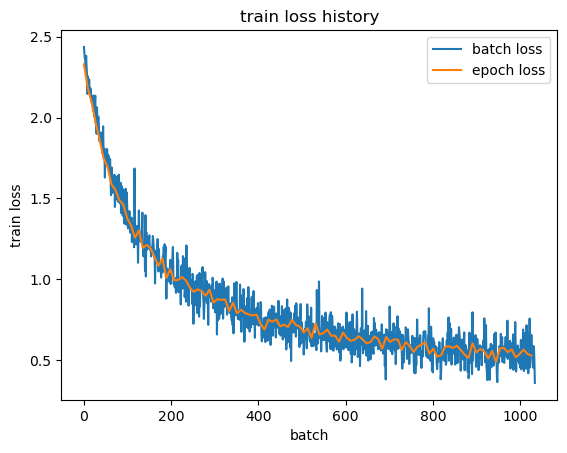

In [15]:
# [TBC] complete your code here with proper comments
# plot the train loss history
plt.figure()
batch = np.arange(len(train_batch_loss_history))
epoch = np.arange(len(train_epoch_loss_history))
batches_per_epoch = (int(len(train_feature) / batch_size + 1))
plt.plot(batch, train_batch_loss_history, '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, train_epoch_loss_history, '-', label = 'epoch loss')
plt.title('train loss history')
plt.xlabel('batch')
plt.ylabel('train loss')
plt.legend()
plt.show()

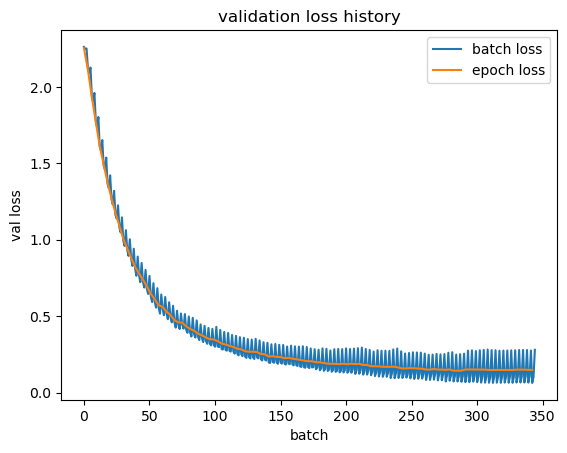

In [16]:
# [TBC] complete your code here with proper comments
# plot the val loss history
plt.figure()
batch = np.arange(len(val_batch_loss_history))
epoch = np.arange(len(val_epoch_loss_history))
batches_per_epoch = (int(len(val_feature) / batch_size + 1))
plt.plot(batch, val_batch_loss_history, '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, val_epoch_loss_history, '-', label = 'epoch loss')
plt.title('validation loss history')
plt.xlabel('batch')
plt.ylabel('val loss')
plt.legend()
plt.show()

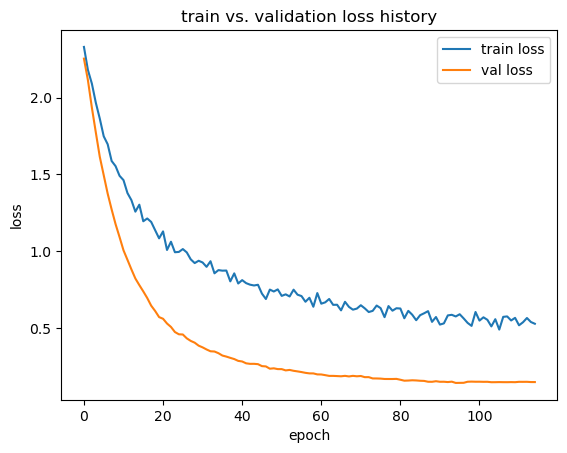

In [17]:
# [TBC] complete your code here with proper comments
# plot the train vs. val loss history
plt.figure()
plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, '-', label = 'train loss')
plt.plot(np.arange(len(val_epoch_loss_history)), val_epoch_loss_history, '-', label = 'val loss')
plt.title('train vs. validation loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Task 4. Save and load the trained model

<span style="color:red">**[TBC]**</span> You need to:
- Save the trained model
    - <span style="color:red">**Don't forget to include the saved file in your submission.**</span>
- Re-create the neural network and load the saved model

In [18]:
# [TBC] complete your code here with proper comments
# save model
file_name = 'digits_recognition_net.pth'
torch.save(model.state_dict(), file_name)
print('Saved PyTorch Model State to '+ file_name)

Saved PyTorch Model State to digits_recognition_net.pth


In [19]:
# [TBC] complete your code here with proper comments
# load model
model = MultiClassificationNet(
    n_features = feature.shape[1],
    n_labels = encoded_label.shape[1]
)
model.load_state_dict(torch.load(file_name))

<All keys matched successfully>

## Task 5. Make predictions and evaluation

<span style="color:red">**[TBC]**</span> You need to:
- Define the `test()` function
    - Output logits, probabilities and predictions
    - Output the loss value on the test set
- Make predictions on the test dataset
- Evaluate the performance
    - Use `sklearn.metrics.classification_report()`

In [20]:
# [TBC] complete your code here with proper comments
# define a function to make predictions on test dataset and evaluate the performance
def test(dataloader, model, loss_fn):
    batch_logits_list = [] # for recording batch logits
    batch_prob_list = [] # for recording batch probabilities
    batch_pred_list = [] # for recording batch predictions
    model.eval() # set the model in evaluation mode
    with torch.no_grad(): # disable automatic gradient computing
        loss = 0.0 # set initial test loss to zero
        for (X, y) in dataloader: # get a batch from test samples
            batch_logits = model(X) # forward propagation
            batch_prob = torch.softmax(batch_logits, dim = -1) # convert logtis to probabilities
            _, batch_pred = torch.max(batch_logits, 1) # conver probabilities to predictions
            batch_loss = loss_fn(batch_logits, y) # compute current batch loss
            loss += batch_loss.item() # accumulate batch losses for compute test loss
            batch_logits_list.append(batch_logits) # record logits on current batch
            batch_prob_list.append(batch_prob) # record probabilities on current batch
            batch_pred_list.append(batch_pred) # record predictions on current batch
        loss /= len(dataloader) # compute test loss
        logits = np.concatenate(batch_logits_list) # reform the logits
        prob = np.concatenate(batch_prob_list) # reform the probabilities
        pred = np.concatenate(batch_pred_list) # reform the predictions
        print(f"test loss = {loss}") # print log
    return logits, prob, pred, loss

In [21]:
# [TBC] complete your code here with proper comments
# make prediction on test set and evaluate the performance
test_logits, test_prob, test_pred, test_loss = test(test_dl, model, loss_fn)
print(classification_report(test_label, test_pred))

test loss = 0.17017699281374613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.94      0.93        35
           2       0.92      1.00      0.96        36
           3       0.97      0.97      0.97        29
           4       0.91      0.97      0.94        30
           5       1.00      0.97      0.99        40
           6       1.00      0.98      0.99        44
           7       0.95      0.92      0.94        39
           8       0.97      0.92      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



The recognized digit is: 2
The predicted probability is: 0.9999901


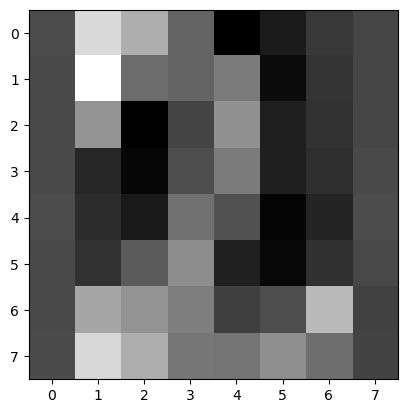

In [22]:
# [TBC] complete your code here with proper comments
# display an example
plt.imshow(test_feature[10].reshape(8, 8), cmap = 'gray')
print('The recognized digit is:', test_pred[10])
print('The predicted probability is:', test_prob[10, test_pred[10]])